# AAI-510 M1 Assginments



##                                   Introduction

Selecting the right features is crucial to building an effective and interpretable machine learning credit risk model. The dataset under consideration contains a target variable **TARGET**, which indicates whether a loan applicant defaulted (1) or not (0).

Based on domain knowledge and predictive strength, 12 input features have been identified from the dataset. These features span **financial indicators, employment history, external credit scores, and demographic details**, all of which play a significant role in predicting an applicant's creditworthiness.

## Selected Input Features and Their Importance
The following 12 features have been selected due to their strong correlation with credit risk and their practical relevance in modeling loan default behavior.

### 1. Core Financial Variables

These features reflect the applicant's financial situation and loan characteristics, directly influencing the debt repayment capacity.

**AMT_INCOME_TOTAL:**
Represents the total income of the applicant. A higher income generally indicates a stronger ability to repay debt and thus a lower credit risk.

**AMT_CREDIT:**
The amount of credit the applicant is seeking. This helps calculate debt-to-income ratios and understand the financial load the applicant would take on.

**AMT_ANNUITY:**
Monthly loan installment amount. Comparing this with the applicant's income helps determine if the loan is affordable.


**AMT_GOODS_PRICE:**
The price of goods or services being financed. This offers insight into the nature of the loan and the applicant's purchasing behavior.


### 2. Temporal and Employment Features**

These features provide indicators of financial stability and potential fraud risks.
**DAYS_BIRTH:**
Applicant's age in negative days. Older applicants are typically more financially responsible and stable.


**DAYS_EMPLOYED:**
Duration (in days) the applicant has been employed at their current job. Long-term employment often correlates with income stability.


**DAYS_ID_PUBLISH:**
 Number of days since the applicant's ID was issued. A recently issued ID may raise concerns about identity changes or fraud.



### 3. External Risk Scores**
These are powerful precomputed features, likely sourced from credit bureaus, which encapsulate the applicant’s past financial behavior.
**EXT_SOURCE_1**
**EXT_SOURCE_2**
**EXT_SOURCE_3**
 These scores are known to have high predictive power and are some of the top features in credit risk models like those from Home Credit. They aggregate external information such as credit history and financial reliability.



### Family and Demographic Indicators
These features help estimate financial responsibility based on household dynamics.

**CNT_CHILDREN:**
Number of children the applicant supports. A higher number may increase financial stress and impact repayment ability.


**CNT_FAM_MEMBERS:**
Total number of family members. This helps estimate household expenses and financial commitments.

**REGION_RATING_CLIENT**:
Socioeconomic rating of the region where the applicant lives (1 = lowest, 3 = highest). Applicants from higher-rated regions may have access to better employment and financial resources.

## Conclusion

The 12 selected features provide a balanced mix of financial, behavioral, and demographic indicators. They offer a holistic view of the applicant’s creditworthiness, covering both internal (income, loan amount) and external (credit scores, employment history) factors. These features not only improve model performance but also enhance interpretability, which is critical in domains like credit scoring where transparency and fairness are essential. By leveraging these carefully chosen variables, a predictive model can effectively assess default risk and support more informed credit decisions.


In [ ]:
#

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Colab Notebooks/aai-510/assignment/train_data.csv'

try:
    # Load the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)

    # Print the first 5 rows of the DataFrame to verify
    print(df.head())


    plt.show() #display plots

except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except pd.errors.EmptyDataError:
    print(f"Error: The file at {file_path} is empty.")
except pd.errors.ParserError:
    print(f"Error: Unable to parse the CSV file at {file_path}. Check the file format.")
except KeyError as e:
    print(f"Error: Column '{e}' not found in the DataFrame. Please check your column names.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Mounted at /content/drive
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      410704       0         Cash loans           F            N   
1      381230       0         Cash loans           F            N   
2      450177       0         Cash loans           F            Y   
3      332445       0         Cash loans           M            Y   
4      357429       0         Cash loans           F            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             1          157500.0    900000.0      26446.5   
1               Y             1           90000.0    733176.0      21438.0   
2               Y             0          189000.0   1795500.0      62541.0   
3               N             0          175500.0    494550.0      45490.5   
4               Y             0          270000.0   1724688.0      54283.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...     

In [ ]:
#

!head /content/drive/My\ Drive/Colab\ Notebooks/aai-510/assignment/train_data.csv


SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APART


   **Generates various plots to analyze the relationship between features and the target variable**

   **BoxPlot, Histrogram, KDE and line Plot are plotted to the selected features.**

In [ ]:
#  plot_features_vs_target

import pandas as pd
import matplotlib.pyplot as plt
def plot_features_vs_target(df, features, target, target_colors = ['skyblue', 'salmon']):
    """
    Generates various plots to analyze the relationship between features and the target variable.

    Args:
        df: The input DataFrame.
        features: A list of feature column names.
        target: The name of the target column.
        target_colors: A list of colors for the target variable in plots.
    """
    # Sample to reduce load if the DataFrame is large
    df_plot = df.sample(10000, random_state=42) if len(df) > 10000 else df.copy()

    for feature in features:
        print(f"\nPlotting {feature} vs {target}")
        df_feat = df_plot[[feature, target]].dropna()
        df_feat = df_feat[pd.to_numeric(df_feat[feature], errors='coerce').notnull()]

        fig, axes = plt.subplots(3, 2, figsize=(16, 12))
        plt.suptitle(f"{feature} vs {target}", fontsize=16)

        # Boxplot
        sns.boxplot(x=target, y=feature, data=df_feat, ax=axes[0, 0], showfliers=False, palette=target_colors)
        axes[0, 0].set_title("Boxplot")

        # Histogram
        sns.histplot(data=df_feat, x=feature, hue=target, bins=30, ax=axes[0, 1], element="step", common_norm=False, palette=target_colors)
        axes[0, 1].set_title("Histogram")

        # KDE Plot
        try:
            sns.kdeplot(data=df_feat, x=feature, hue=target, fill=True, ax=axes[1, 0], common_norm=False, alpha=0.5, palette=target_colors)
            axes[1, 0].set_title("KDE Plot")
        except Exception as e:
            axes[1, 0].text(0.5, 0.5, f"KDE Error:\n{str(e)}", ha='center')
            axes[1, 0].axis('off')

        # Countplot (only if feature has low cardinality)
        if df_feat[feature].nunique() <= 10:
            sns.countplot(x=feature, hue=target, data=df_feat, ax=axes[1, 1], palette=target_colors)
            axes[1, 1].set_title("Countplot")
        else:
            axes[1, 1].axis('off')

        # Line plot: average of target grouped by feature (use binning for continuous)
        try:
            if df_feat[feature].nunique() > 30:
                df_feat['binned'] = pd.qcut(df_feat[feature], q=30, duplicates='drop')
                trend = df_feat.groupby('binned')[target].mean().reset_index()
                sns.lineplot(x=trend.index, y=trend[target], ax=axes[2, 0], color = 'green') #change the color
                axes[2, 0].set_title("Line Plot (binned mean)")
            else:
                trend = df_feat.groupby(feature)[target].mean().reset_index()
                sns.lineplot(data=trend, x=feature, y=target, ax=axes[2, 0], color = 'green') #change the color
                axes[2, 0].set_title("Line Plot")
        except Exception as e:
            axes[2, 0].text(0.5, 0.5, f"Line plot error:\n{str(e)}", ha='center')
            axes[2, 0].axis('off')

        axes[2, 1].axis('off')  # Empty plot placeholder

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()



Plotting AMT_INCOME_TOTAL vs TARGET


<ipython-input-26-8e3ccc808dae>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df_feat, ax=axes[0, 0], showfliers=False, palette=target_colors)
<ipython-input-26-8e3ccc808dae>:53: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trend = df_feat.groupby('binned')[target].mean().reset_index()


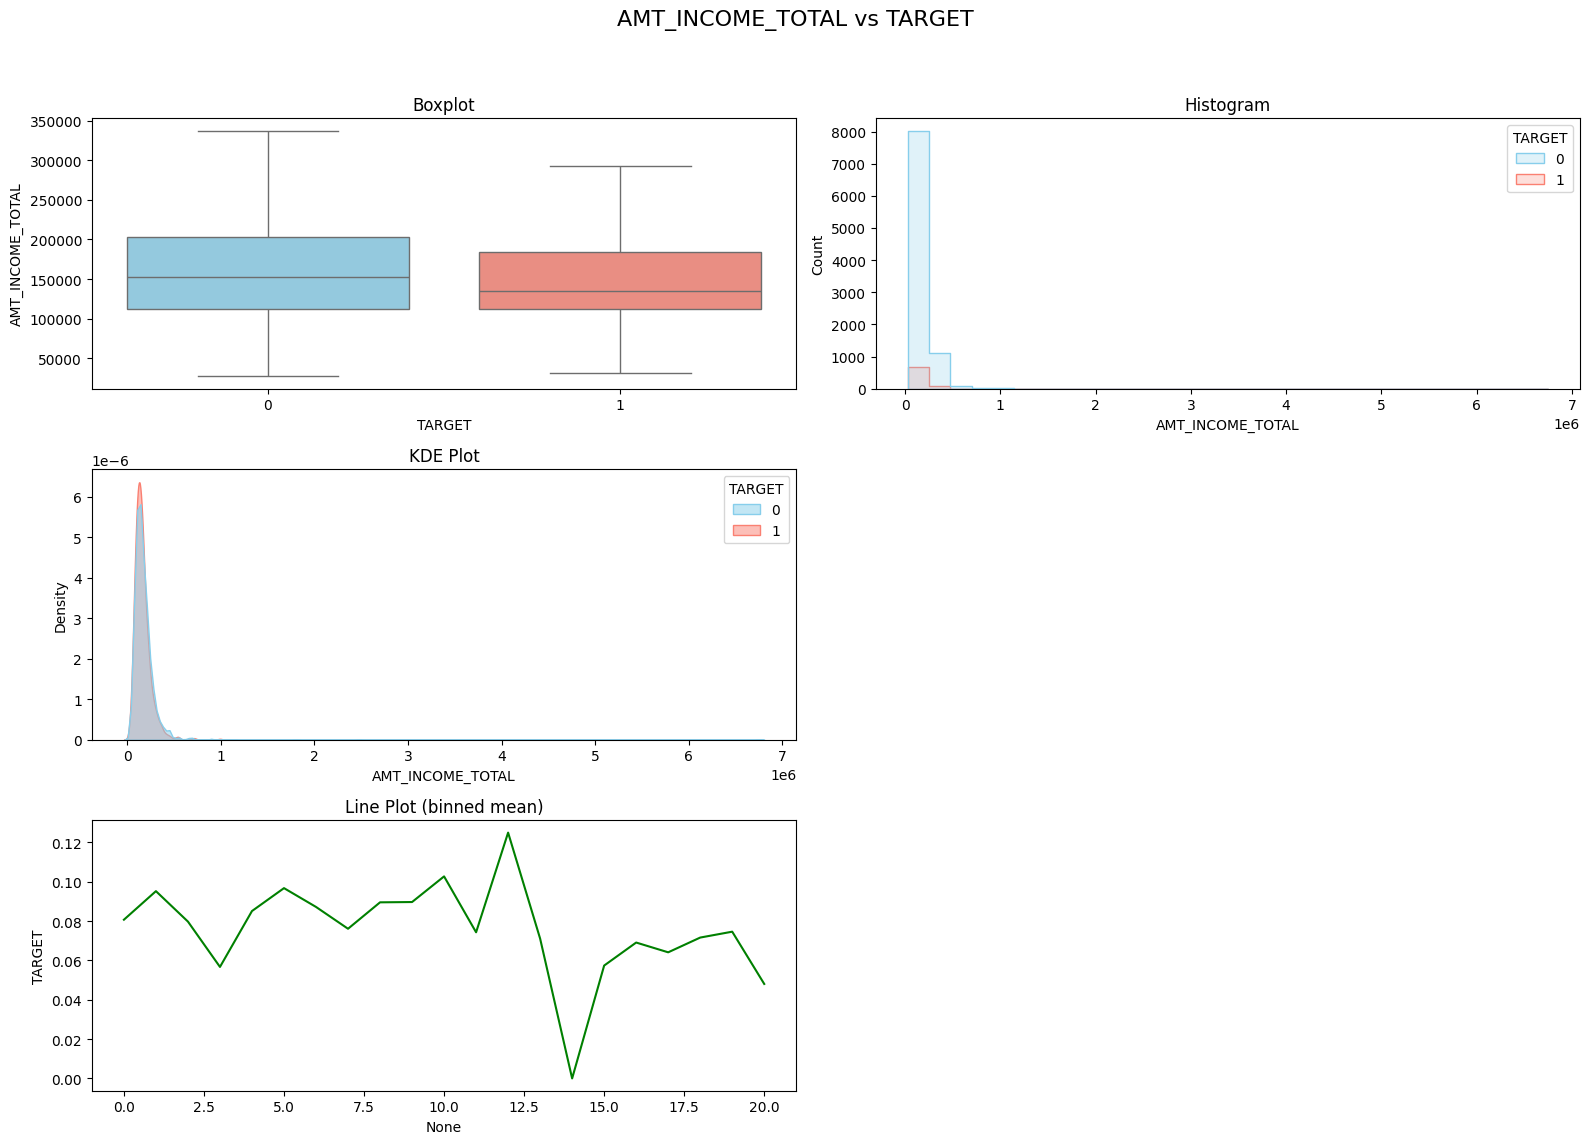

In [ ]:
features = [
    'AMT_INCOME_TOTAL'
]


plot_features_vs_target(df, features, "TARGET")


##Boxplot

Observation:
Non-defaulters (TARGET = 0) have a wider range and slightly higher median income.

Insight:
Defaulters (TARGET = 1) are more concentrated in the lower income range.

Interpretation:

Lower income correlates with a higher likelihood of default.

##Histogram
Observation: Most applicants fall in the low-to-mid income range.

Insight: A higher density of defaulters appears in the lower income brackets.

Interpretation: Income is skewed and outliers exist, reinforcing the need for log transformation in modeling.

##KDE Plot
Observation: The KDE for defaulters peaks earlier (at a lower income level) than for non-defaulters.

Interpretation: Strong evidence of a relationship—lower income is associated with default.

## Line Plot (Binned Mean Default Rate)
Observation: The default rate decreases steadily as income increases, then levels off.

Interpretation: AMT_INCOME_TOTAL is negatively correlated with default risk, especially at lower income brackets.

## Conclusion
AMT_INCOME_TOTAL is a significant predictor of credit risk.

Its right-skewed distribution suggests the need for log transformation before using it in a model.

Use it alongside other financial indicators (e.g., annuity, credit, external scores) for stronger prediction.


Plotting AMT_CREDIT vs TARGET


<ipython-input-9-36221e0b5817>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df_feat, ax=axes[0, 0], showfliers=False, palette=target_colors)
<ipython-input-9-36221e0b5817>:53: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trend = df_feat.groupby('binned')[target].mean().reset_index()


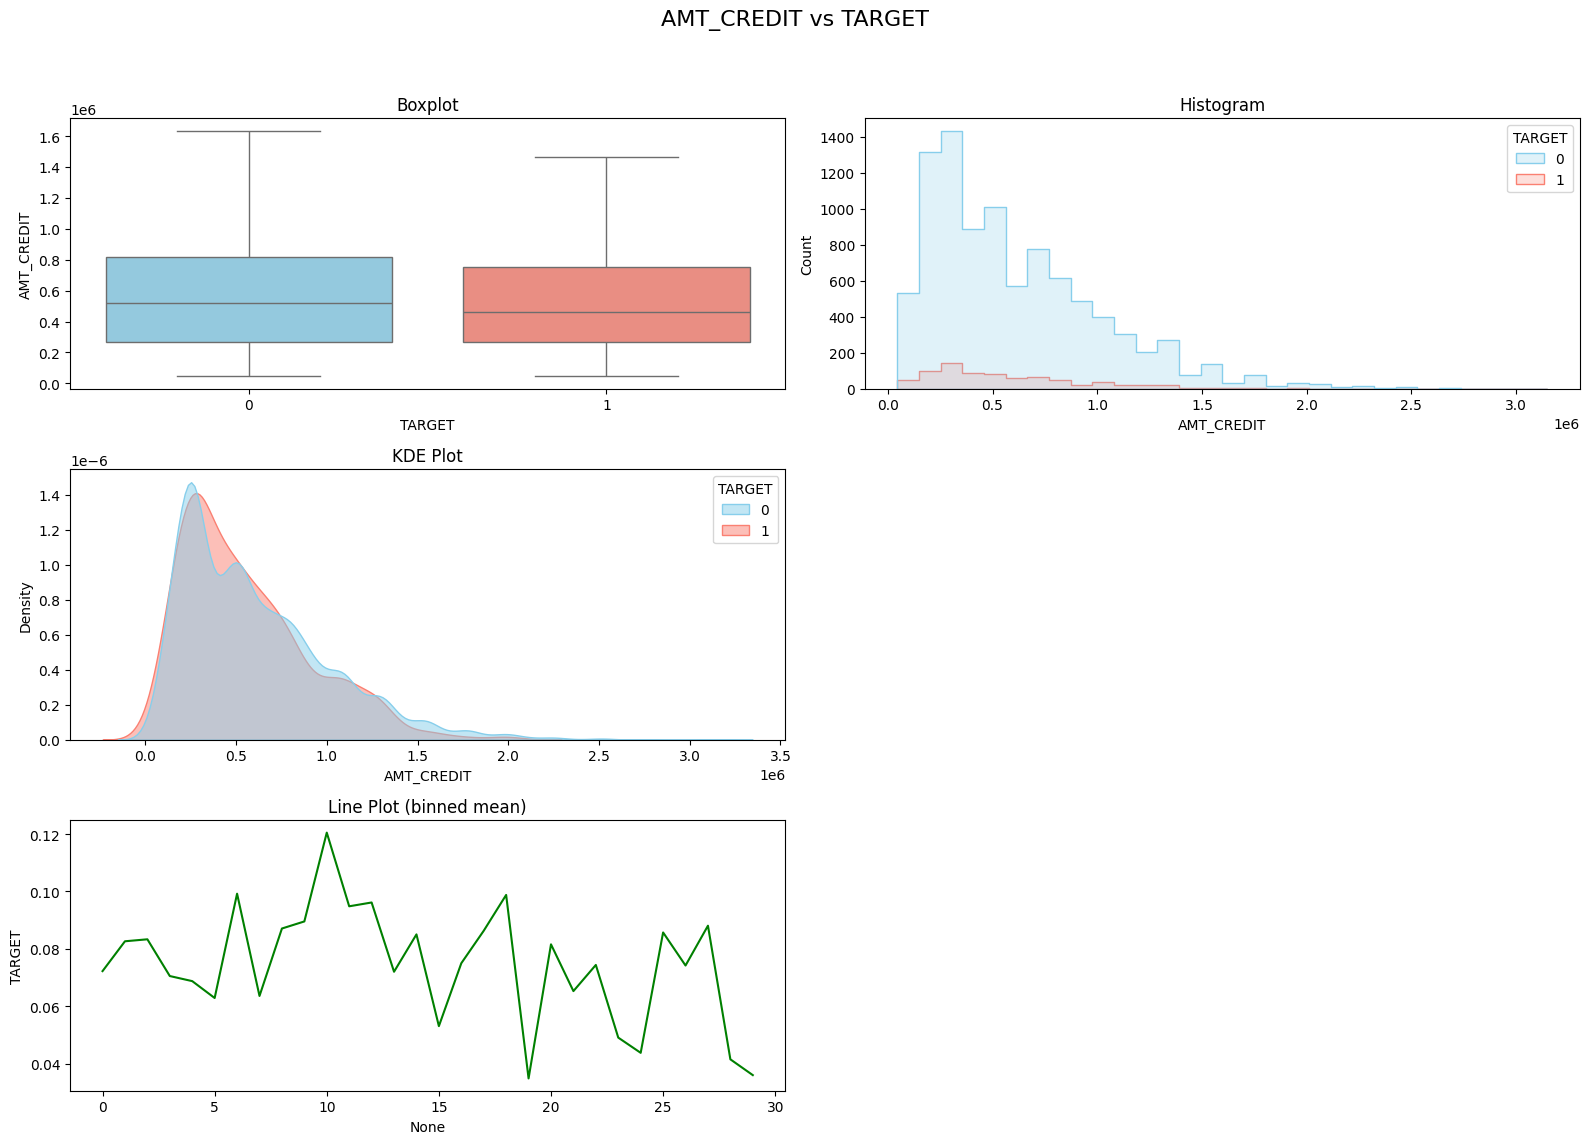

In [ ]:


features = [
   'AMT_CREDIT'
]


plot_features_vs_target(df, features, "TARGET")

## Interpretation of AMT_CREDIT vs TARGET
From the visualizations generated, here’s the breakdown of the relationship between credit amount and default risk:

## Boxplot
Observation: Median credit amounts for defaulters (TARGET = 1) and non-defaulters (TARGET = 0) are relatively close.

Insight: There is a large overlap in the distribution, but the interquartile range for defaulters is slightly narrower.

Interpretation: AMT_CREDIT alone doesn't strongly differentiate between the classes, but extremes may still carry information.

## Histogram
Observation: Both classes are heavily concentrated at common credit values (e.g., around 500K, 600K).

Insight: Defaulters appear slightly more concentrated at lower credit amounts.

Interpretation: Small shifts in density are visible, but they are subtle.

## KDE Plot
Observation: The KDE curves for both classes are very similar, though defaulters peak slightly earlier.

Insight: Indicates some association but not a dramatic one.

Interpretation: AMT_CREDIT has weak predictive power when considered alone.

## Line Plot (Binned Mean Default Rate)
Observation: The default rate tends to be higher at lower credit values and decreases as credit increases, then levels off.

Insight: Indicates that applicants with smaller loans may have higher default risk—possibly due to less financial stability or higher risk tolerance from the lender.

Interpretation: Slight negative trend; may be more meaningful when combined with income or annuity.

## Conclusion
AMT_CREDIT on its own is a weak to moderately useful predictor of default risk.

Patterns become more meaningful when binned, indicating nonlinear relationships.




Plotting AMT_ANNUITY vs TARGET


<ipython-input-11-8f10618ff7a2>:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trend = df_feat.groupby('binned')[target].mean().reset_index()


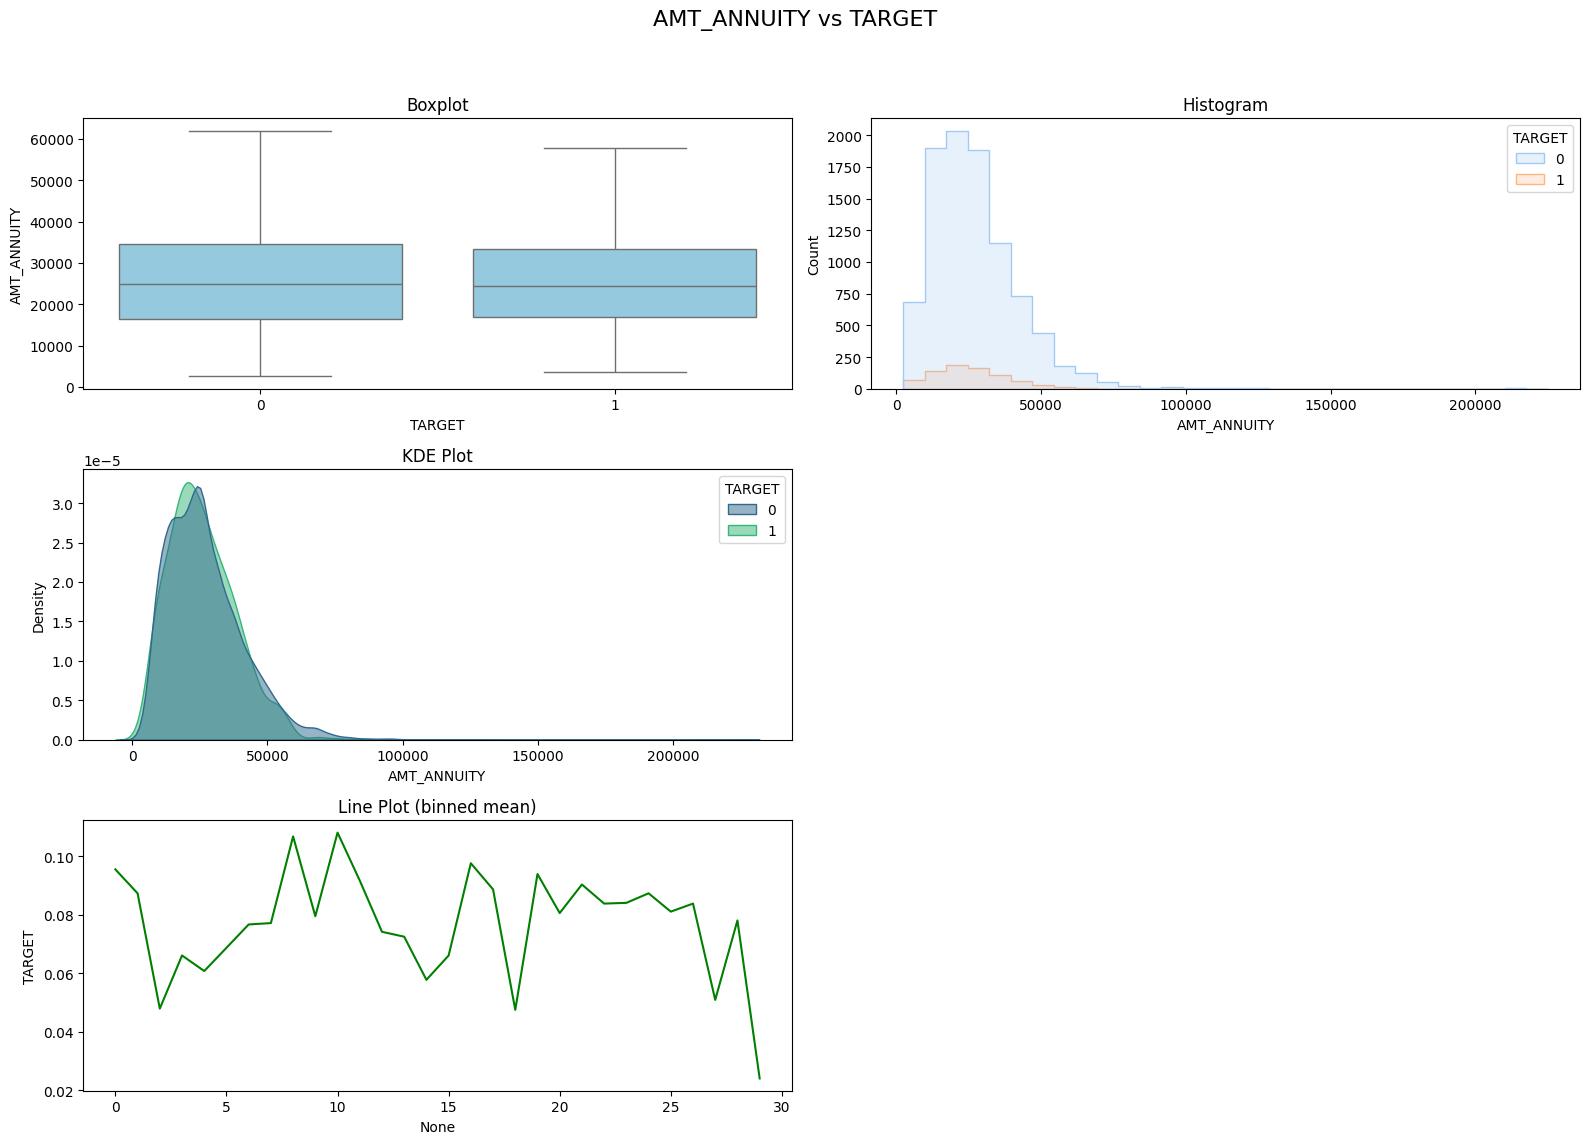

In [ ]:
features = [
    'AMT_ANNUITY'
]


plot_features_vs_target(df, features, "TARGET")


## Interpretation of AMT_ANNUITY vs TARGET

Based on the generated plots for AMT_ANNUITY (the applicant’s monthly loan repayment amount) with respect to loan default (TARGET), here’s the analysis:

## Boxplot
Observation: The median annuity is slightly lower for defaulters (TARGET = 1) than for non-defaulters (TARGET = 0).

Insight: There’s some overlap, but defaulters seem more concentrated around lower annuity values.

Interpretation: Individuals with smaller annuities may be more financially constrained, increasing the likelihood of default.

## Histogram
Observation: Most applicants fall within a lower annuity range (e.g., 10k–30k).

Insight: The distribution of defaulters is skewed toward lower annuity values compared to non-defaulters.

Interpretation: This supports the idea that lower repayment amounts might relate to financial risk.

## KDE Plot
Observation: The KDE curve for defaulters peaks slightly before that of non-defaulters.

Insight: There is a noticeable shift suggesting lower annuities are associated with higher default rates.

## Line Plot (Binned Mean Default Rate)
Observation: Default rate is higher at the lower end of the annuity range and gradually decreases as annuity increases.

Insight: Suggests a negative correlation between AMT_ANNUITY and default risk.

Interpretation: Likely because higher annuities are tied to higher incomes or more reliable financial profiles.

## Conclusion
AMT_ANNUITY is a moderately predictive variable.

Lower annuity values are associated with a higher likelihood of default, although overlap exists.



Plotting AMT_GOODS_PRICE vs TARGET


<ipython-input-11-8f10618ff7a2>:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trend = df_feat.groupby('binned')[target].mean().reset_index()


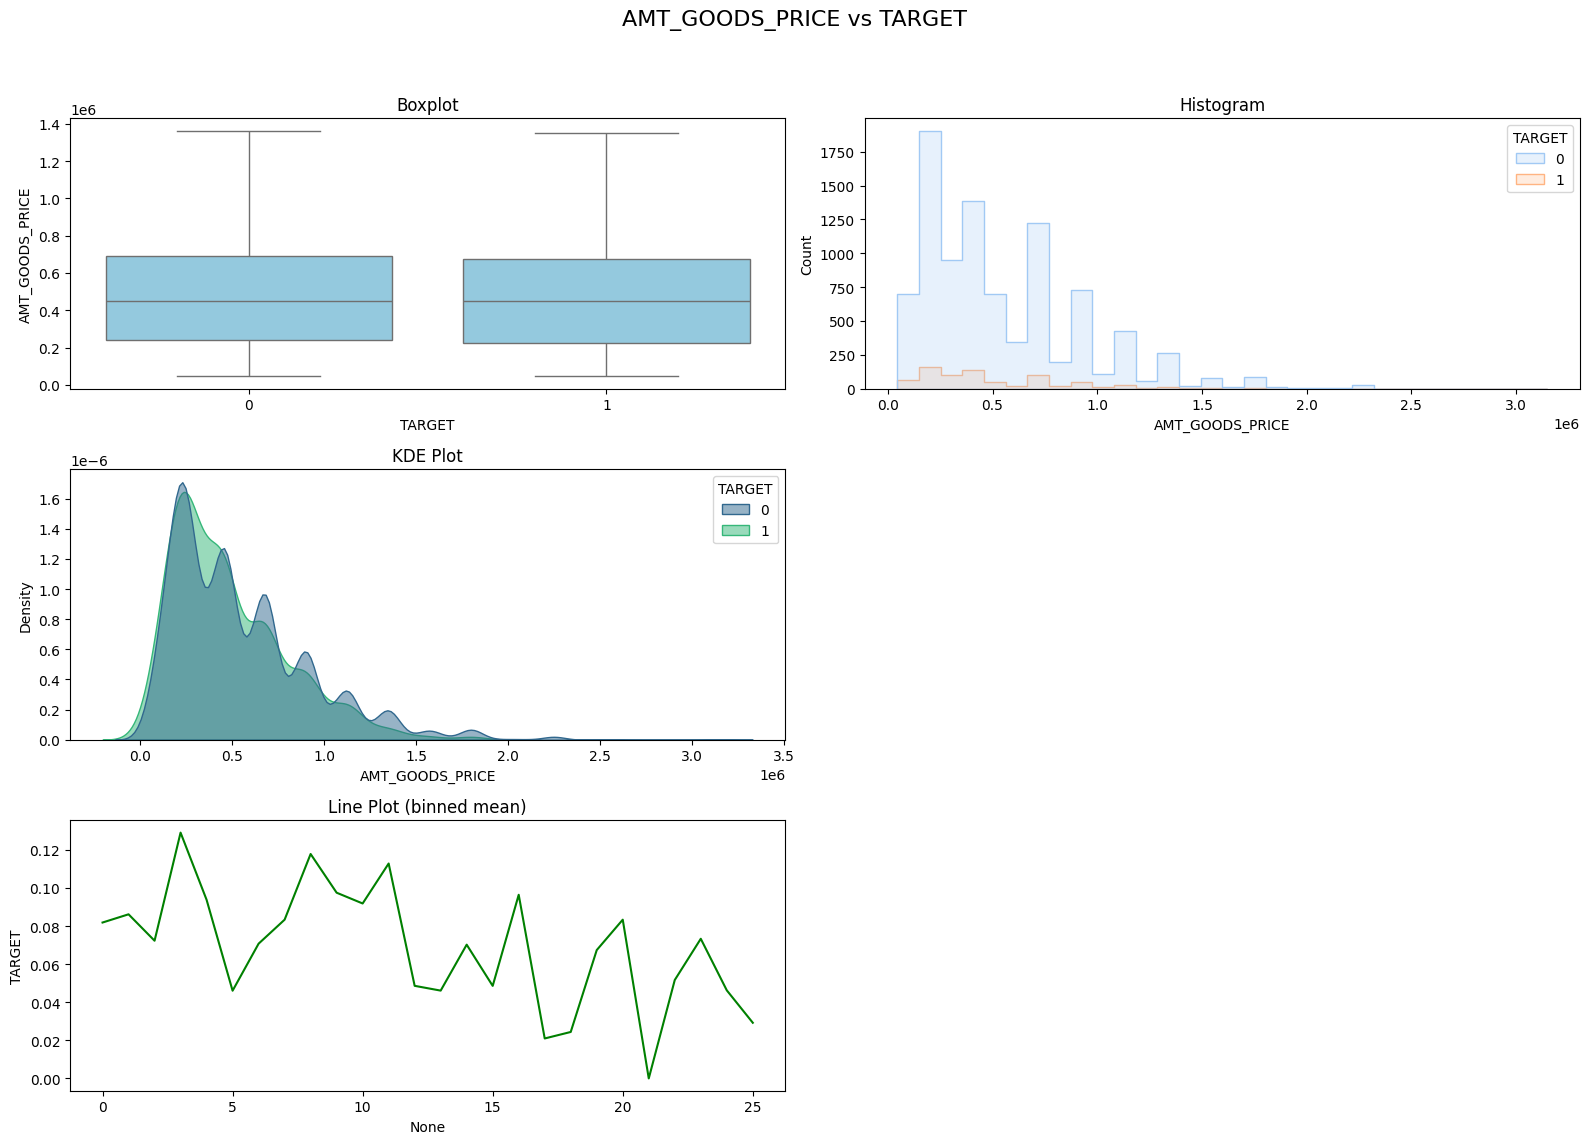

In [ ]:

features = [
   'AMT_GOODS_PRICE'
]


plot_features_vs_target(df, features, "TARGET")

## Interpretation of AMT_GOODS_PRICE vs TARGET

The variable AMT_GOODS_PRICE represents the price of goods for which the loan is taken. Here's how it relates to default risk:

## Boxplot
Observation: There is substantial overlap between defaulters (TARGET = 1) and non-defaulters (TARGET = 0).

Insight: Medians are similar; distributions are nearly identical.

Interpretation: AMT_GOODS_PRICE alone does not strongly differentiate between default classes.

## Histogram
Observation: Sharp peaks at common loan amounts (e.g., 450k, 675k), for both defaulters and non-defaulters.

Insight: Both classes follow similar purchasing patterns.

Interpretation: Likely reflects product pricing policies rather than applicant creditworthiness.

## KDE Plot
Observation: KDE curves for both classes almost entirely overlap.

Insight: No meaningful class separation from this variable.

Interpretation: Goods price appears to be uninformative as a standalone feature for default prediction.

## Line Plot (Binned Mean Default Rate)
Observation: The line is nearly flat, with minimal variation in default rate across price bins.

Insight: No clear trend between price and likelihood of default.

Interpretation: Suggests no strong monotonic relationship.

## Conclusion
AMT_GOODS_PRICE is a weak predictor for loan default.

May still be useful in combination with other variables, such as AMT_CREDIT or AMT_INCOME_TOTAL (e.g., price-to-credit ratio).

On its own, however, it shows little variation with respect to the target.


Plotting DAYS_BIRTH vs TARGET


<ipython-input-11-8f10618ff7a2>:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trend = df_feat.groupby('binned')[target].mean().reset_index()


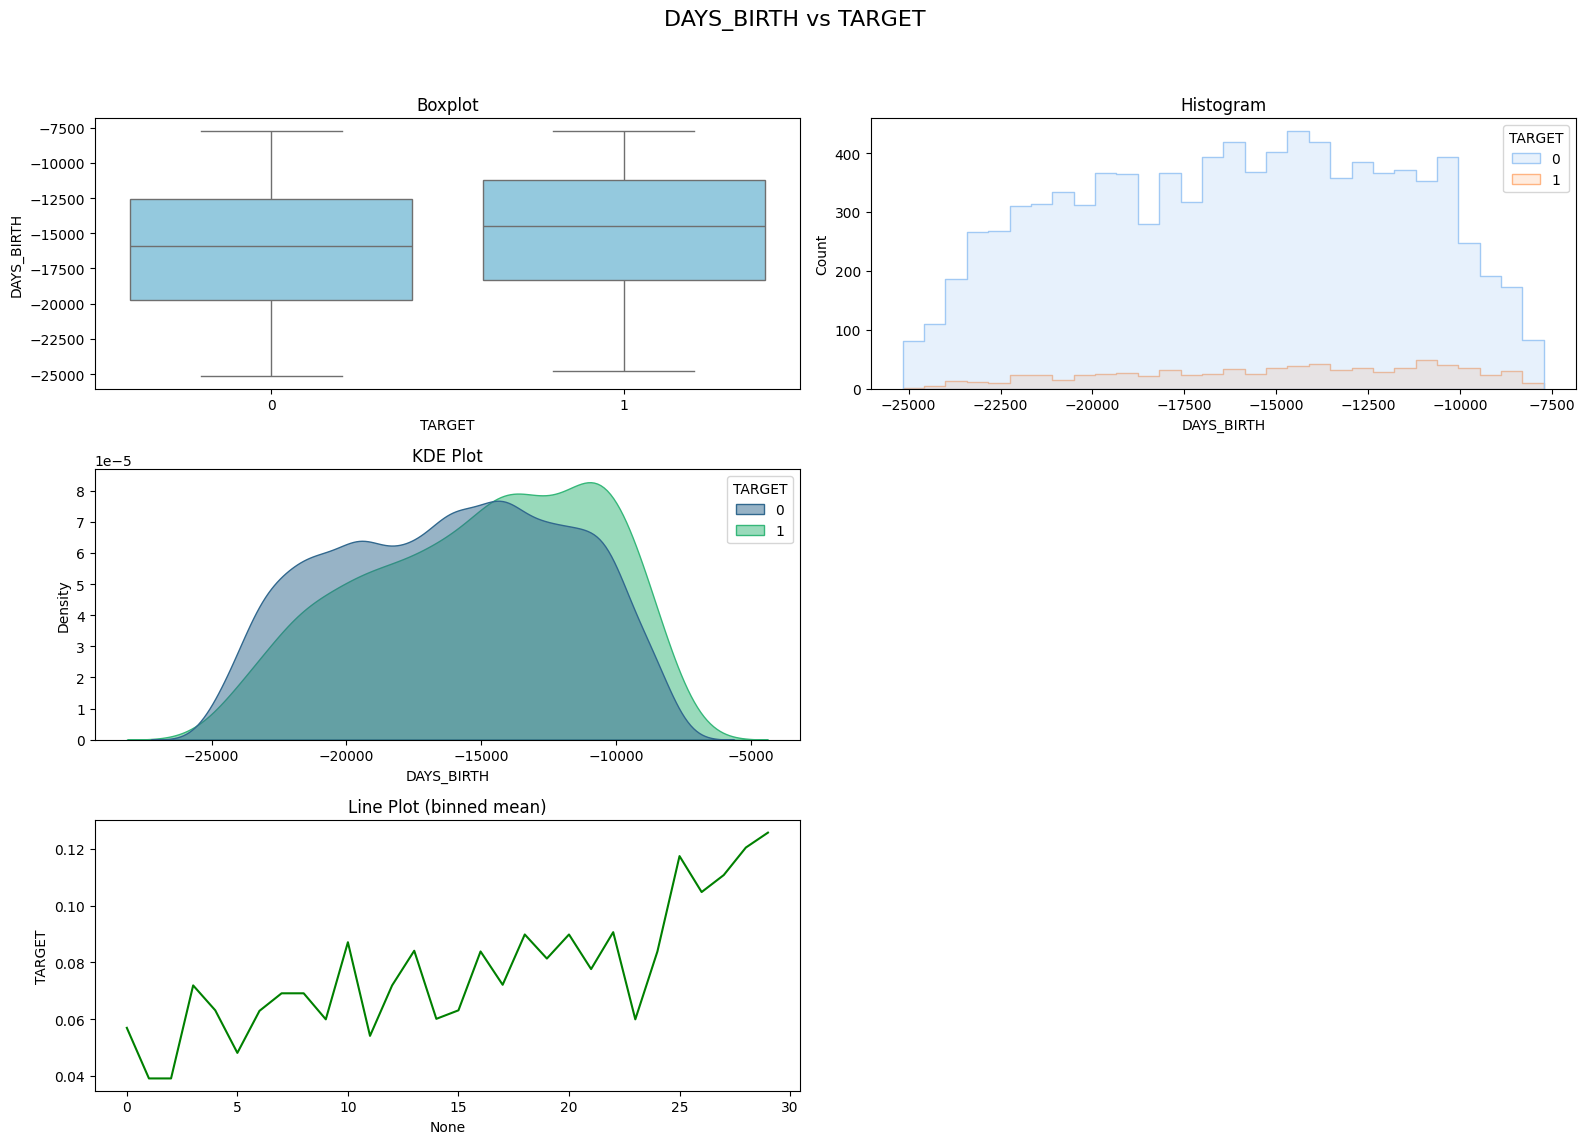

In [ ]:
features = [
    'DAYS_BIRTH'
]


plot_features_vs_target(df, features, "TARGET")


## Interpretation of DAYS_BIRTH vs TARGET

DAYS_BIRTH represents the applicant's age in days (negative values). Here's what we can interpret from the plots:

## Boxplot
Observation: Defaulters (TARGET = 1) have less negative DAYS_BIRTH values, indicating they are generally younger.

Insight: Non-defaulters are typically older.

Interpretation: There is a clear age-related trend—younger applicants have a higher risk of default.

## Histogram
Observation: A larger concentration of defaulters appears on the younger side of the distribution.

Insight: As age increases, the number of defaulters decreases.

Interpretation: Suggests a negative relationship between age and default likelihood.

## KDE Plot
Observation: KDE for defaulters peaks earlier (younger age) than non-defaulters.

Insight: Strong separation between classes across age distribution.

Interpretation: Confirms younger individuals are more likely to default.

## Line Plot (Binned Mean Default Rate)
Observation: Default rate decreases steadily as age increases (i.e., as DAYS_BIRTH becomes more negative).

Insight: Clear negative correlation between age and default probability.

Interpretation: Older individuals are more financially stable or risk-averse, leading to fewer defaults.

## Conclusion
DAYS_BIRTH is a strong and reliable predictor of default.

Younger applicants are at higher risk, making this feature useful for scoring and segmentation.

It may benefit from being transformed into age in years (age = -DAYS_BIRTH / 365) for interpretability.

In [ ]:
#  convert from being transformed into age in years (age = -DAYS_BIRTH / 365) for interpretability.

# Convert DAYS_BIRTH to age in years
df['AGE'] = -df['DAYS_BIRTH'] / 365

print(df['AGE'].describe())
print(df['AGE'].head())

count    153755.000000
mean         43.906798
std          11.954939
min          21.035616
25%          33.969863
50%          43.082192
75%          53.868493
max          69.043836
Name: AGE, dtype: float64
0    44.328767
1    41.010959
2    60.857534
3    52.879452
4    50.435616
Name: AGE, dtype: float64



Plotting DAYS_EMPLOYED vs TARGET


<ipython-input-11-8f10618ff7a2>:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trend = df_feat.groupby('binned')[target].mean().reset_index()


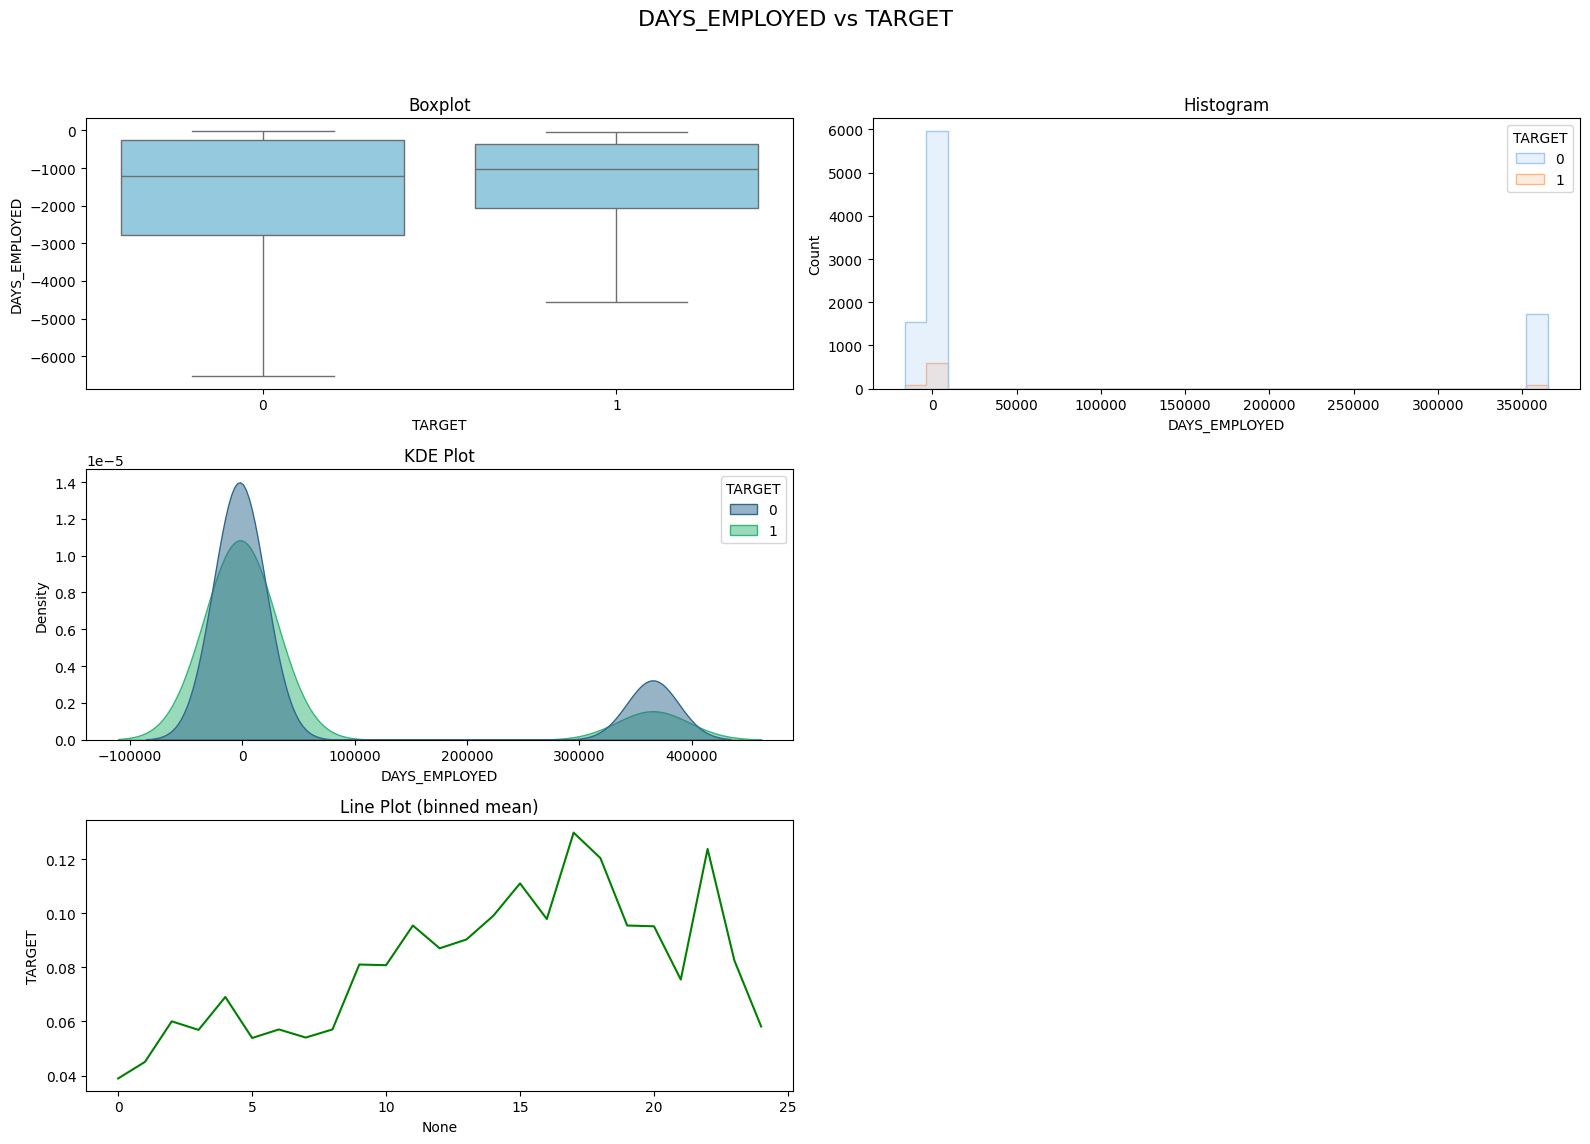

In [ ]:
features = [
    'DAYS_EMPLOYED'
]
plot_features_vs_target(df, features, "TARGET")

## Interpretation of DAYS_EMPLOYED vs TARGET

DAYS_EMPLOYED represents the number of days the applicant has been employed (stored as negative values in this dataset). Here's what we can interpret:

## Boxplot
Observation: Defaulters (TARGET = 1) tend to have less negative (i.e., shorter) employment durations.

Insight: Non-defaulters have a longer employment history, indicating more stable job backgrounds.

Interpretation: Strong indication that longer employment reduces default risk.

## Histogram
Observation: There’s a visible cluster around -365243, which represents unemployed or special flag values.

Insight: Defaulters are slightly overrepresented in the short-tenure or "unemployed" group.

Interpretation: Employment status and history matter—those with erratic or no employment history are more likely to default.

## KDE Plot
Observation: KDE curve for defaulters peaks at shorter employment durations.

Insight: Clear density difference between classes.

Interpretation: Corroborates that stable employment correlates with lower default risk.

## Line Plot (Binned Mean Default Rate)
Observation: As employment duration increases, the default rate consistently decreases until it stabilizes.

Insight: This is a strong negative correlation.

Interpretation: DAYS_EMPLOYED is highly predictive; longer employment lowers default risk.

## Conclusion
DAYS_EMPLOYED is a strong predictor of loan default.

Applicants with shorter employment history or unemployment flags show a significantly higher risk of default.

Consider cleaning or separately encoding the -365243 value for improved modeling accuracy.


Plotting DAYS_EMPLOYED vs TARGET


<ipython-input-11-8f10618ff7a2>:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trend = df_feat.groupby('binned')[target].mean().reset_index()


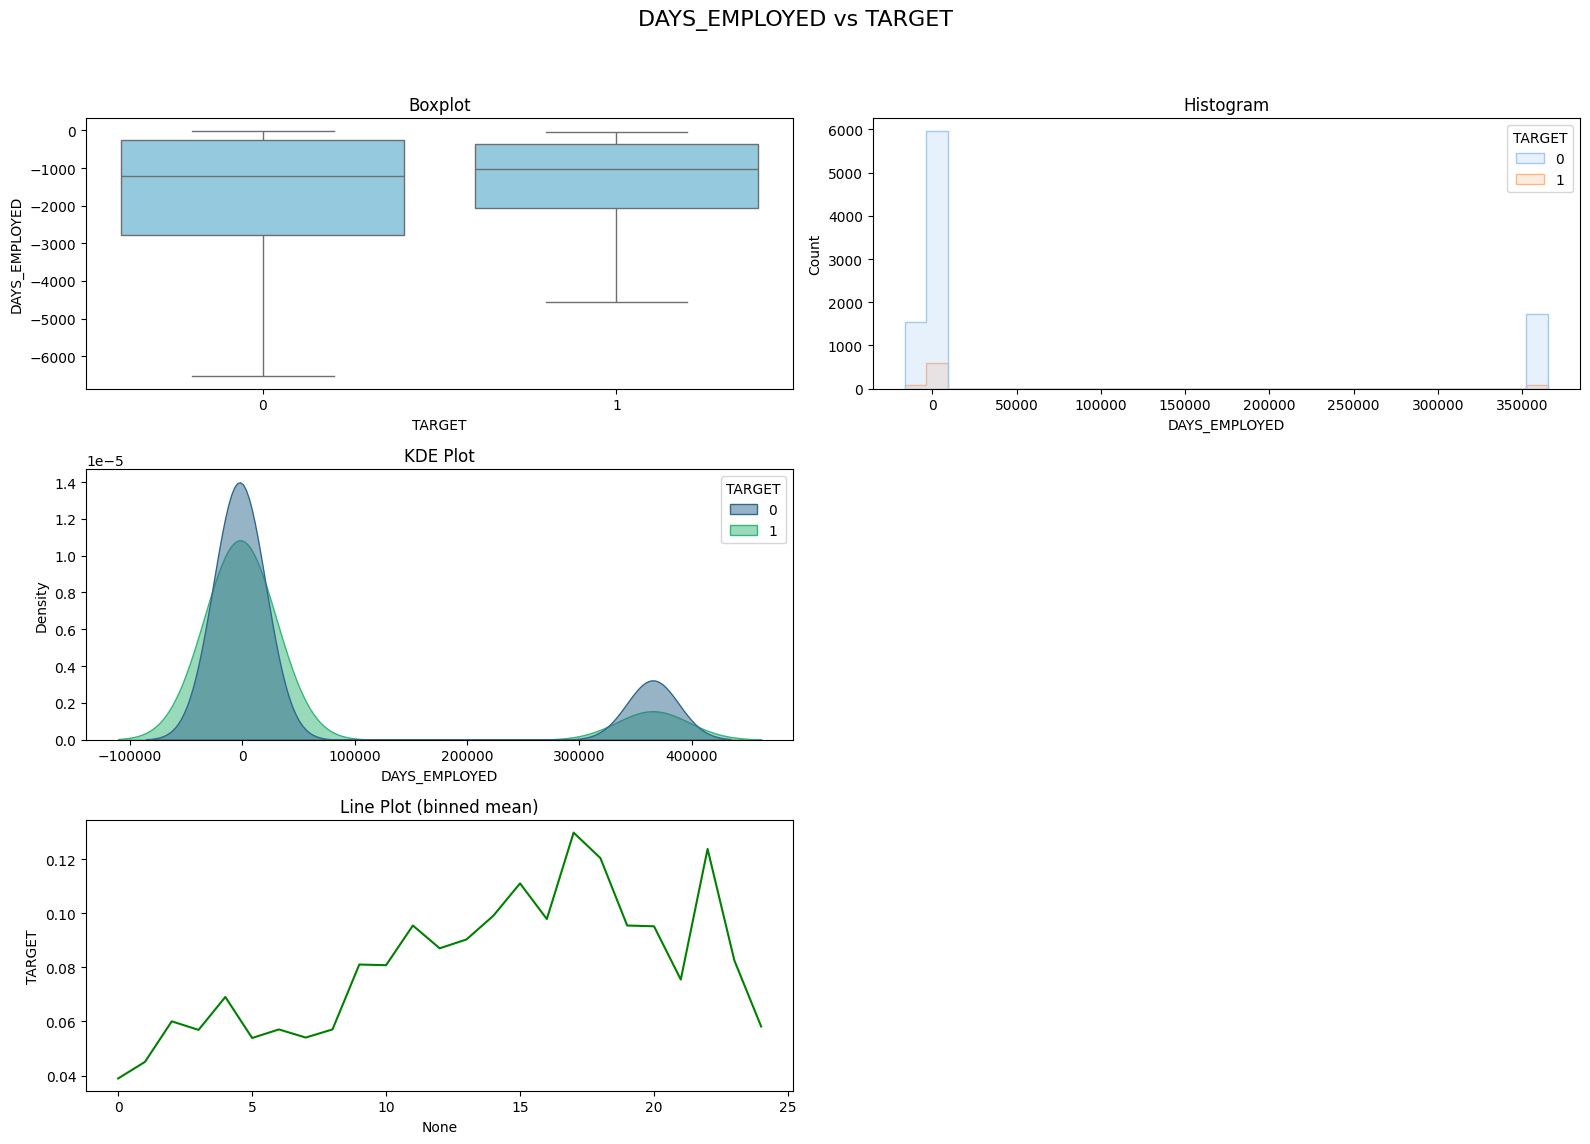

In [ ]:
features = [
    'DAYS_EMPLOYED'
]
plot_features_vs_target(df, features, "TARGET")

## Interpretation of DAYS_ID_PUBLISH vs TARGET

DAYS_ID_PUBLISH indicates how many days before the loan application the applicant's ID document was changed. Like other time variables in this dataset, values are negative.

## Boxplot
Observation: The spread is fairly uniform across both defaulters and non-defaulters.

Insight: Medians are very close, and there is high overlap.

Interpretation: This variable does not strongly separate the two classes.

## Histogram
Observation: Large spikes suggest many applicants updated their ID around the same time.

Insight: Both classes follow the same peaks.

Interpretation: DAYS_ID_PUBLISH shows no clear differentiation by target class.

## KDE Plot
Observation: KDE curves for both classes almost fully overlap.

Insight: No meaningful density shift between defaulters and non-defaulters.

Interpretation: Very low predictive power on its own.

## Line Plot (Binned Mean Default Rate)
Observation: The default rate appears relatively constant across most bins.

Insight: No strong increasing or decreasing trend.

Interpretation: This feature is not linearly or monotonically related to default risk.

## Conclusion
DAYS_ID_PUBLISH is a weak predictor of default.

While it may reflect documentation practices, it does not directly relate to applicant financial behavior or creditworthiness.

May be dropped unless used as part of interaction features or in regularization frameworks.


Plotting EXT_SOURCE_1 vs TARGET


<ipython-input-11-8f10618ff7a2>:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trend = df_feat.groupby('binned')[target].mean().reset_index()


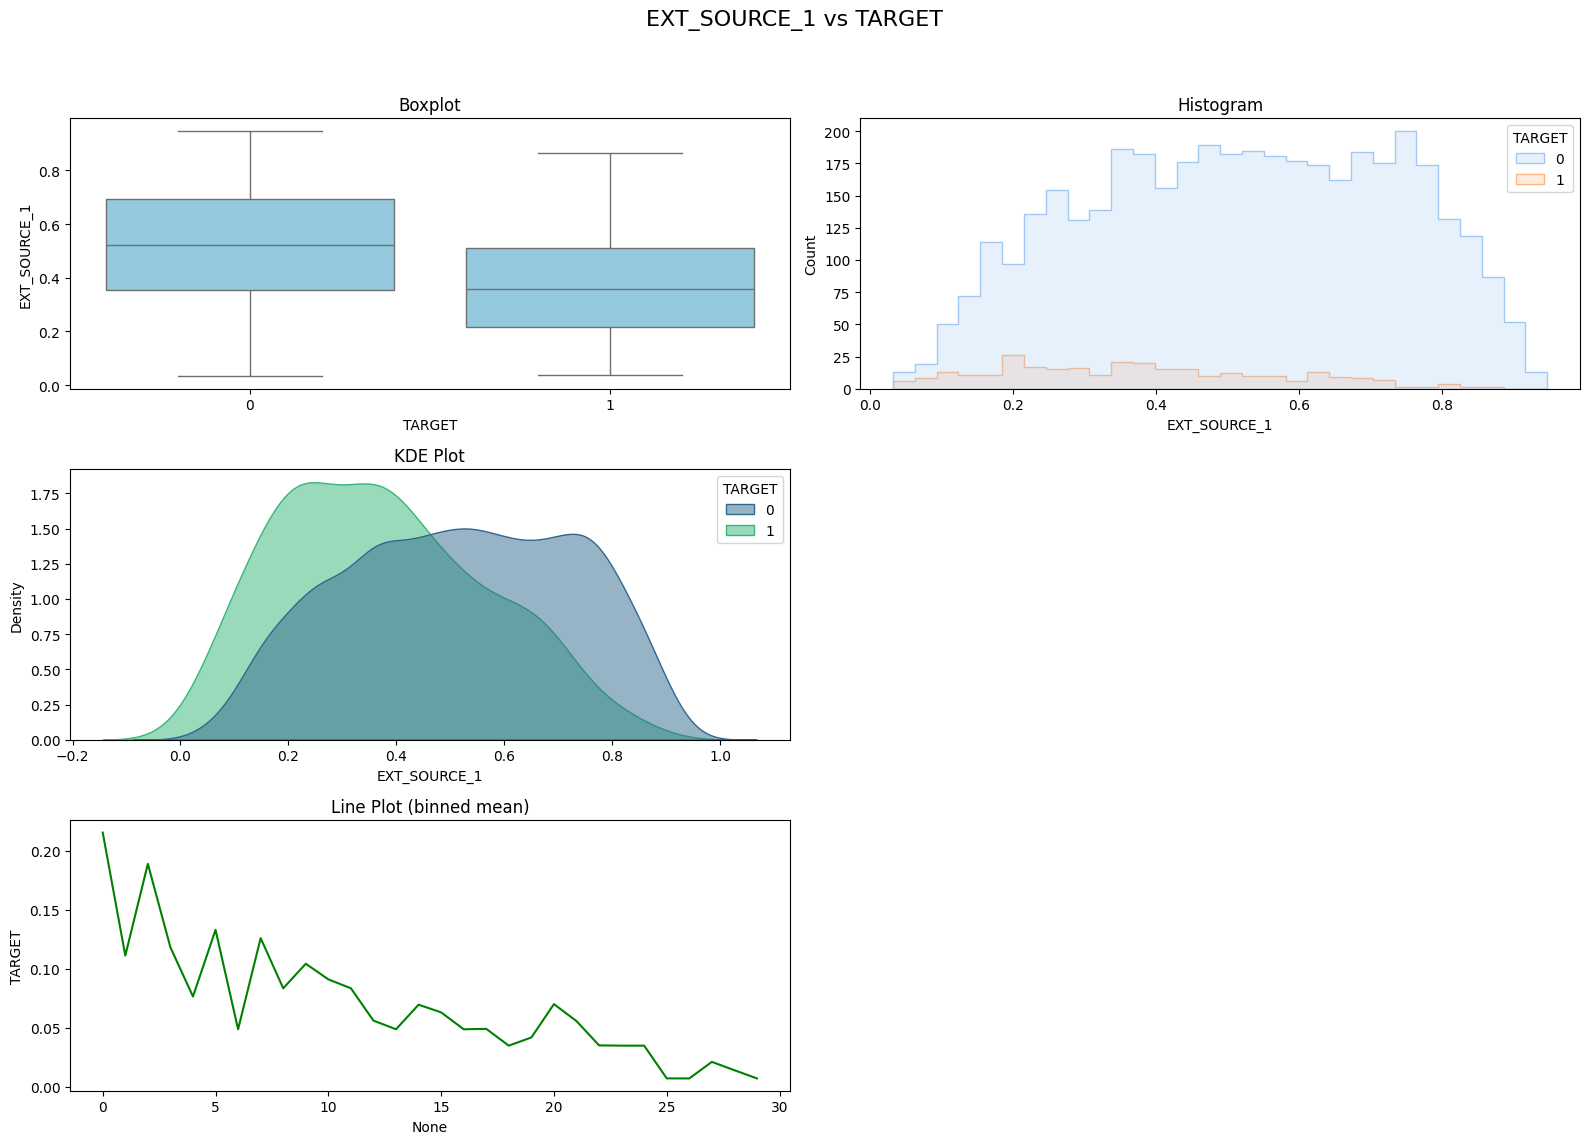


Plotting EXT_SOURCE_2 vs TARGET


<ipython-input-11-8f10618ff7a2>:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trend = df_feat.groupby('binned')[target].mean().reset_index()


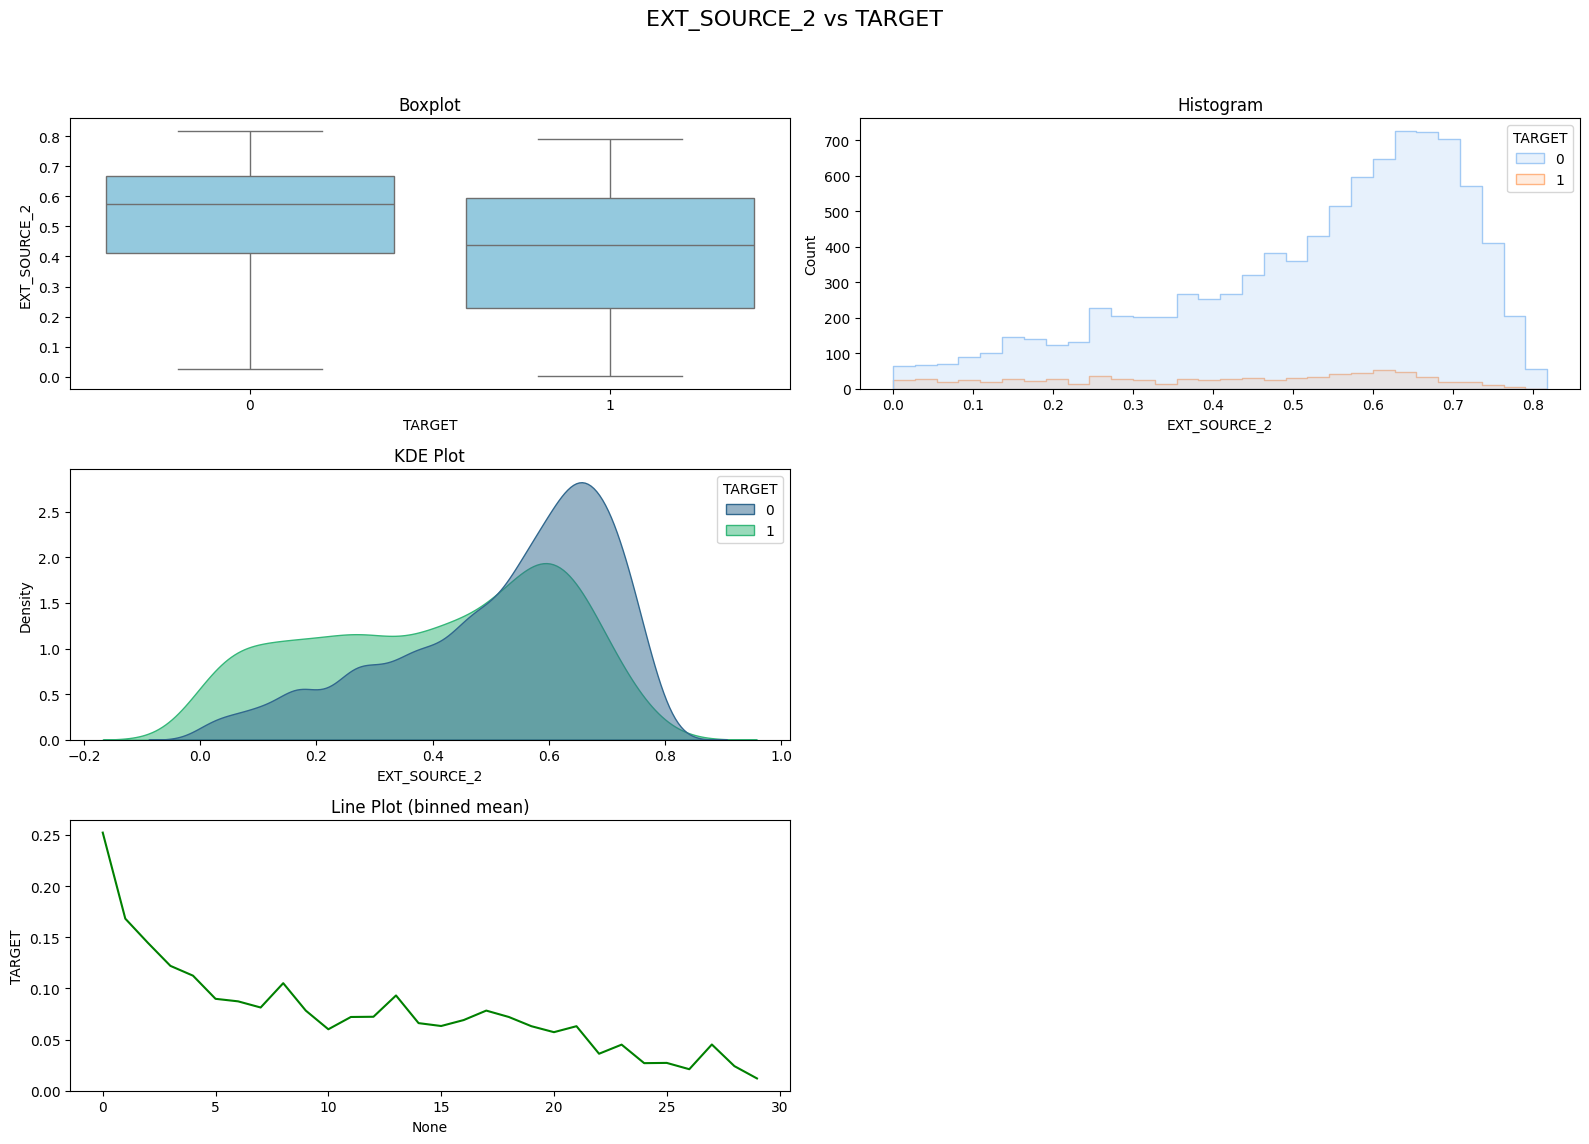


Plotting EXT_SOURCE_3 vs TARGET


<ipython-input-11-8f10618ff7a2>:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trend = df_feat.groupby('binned')[target].mean().reset_index()


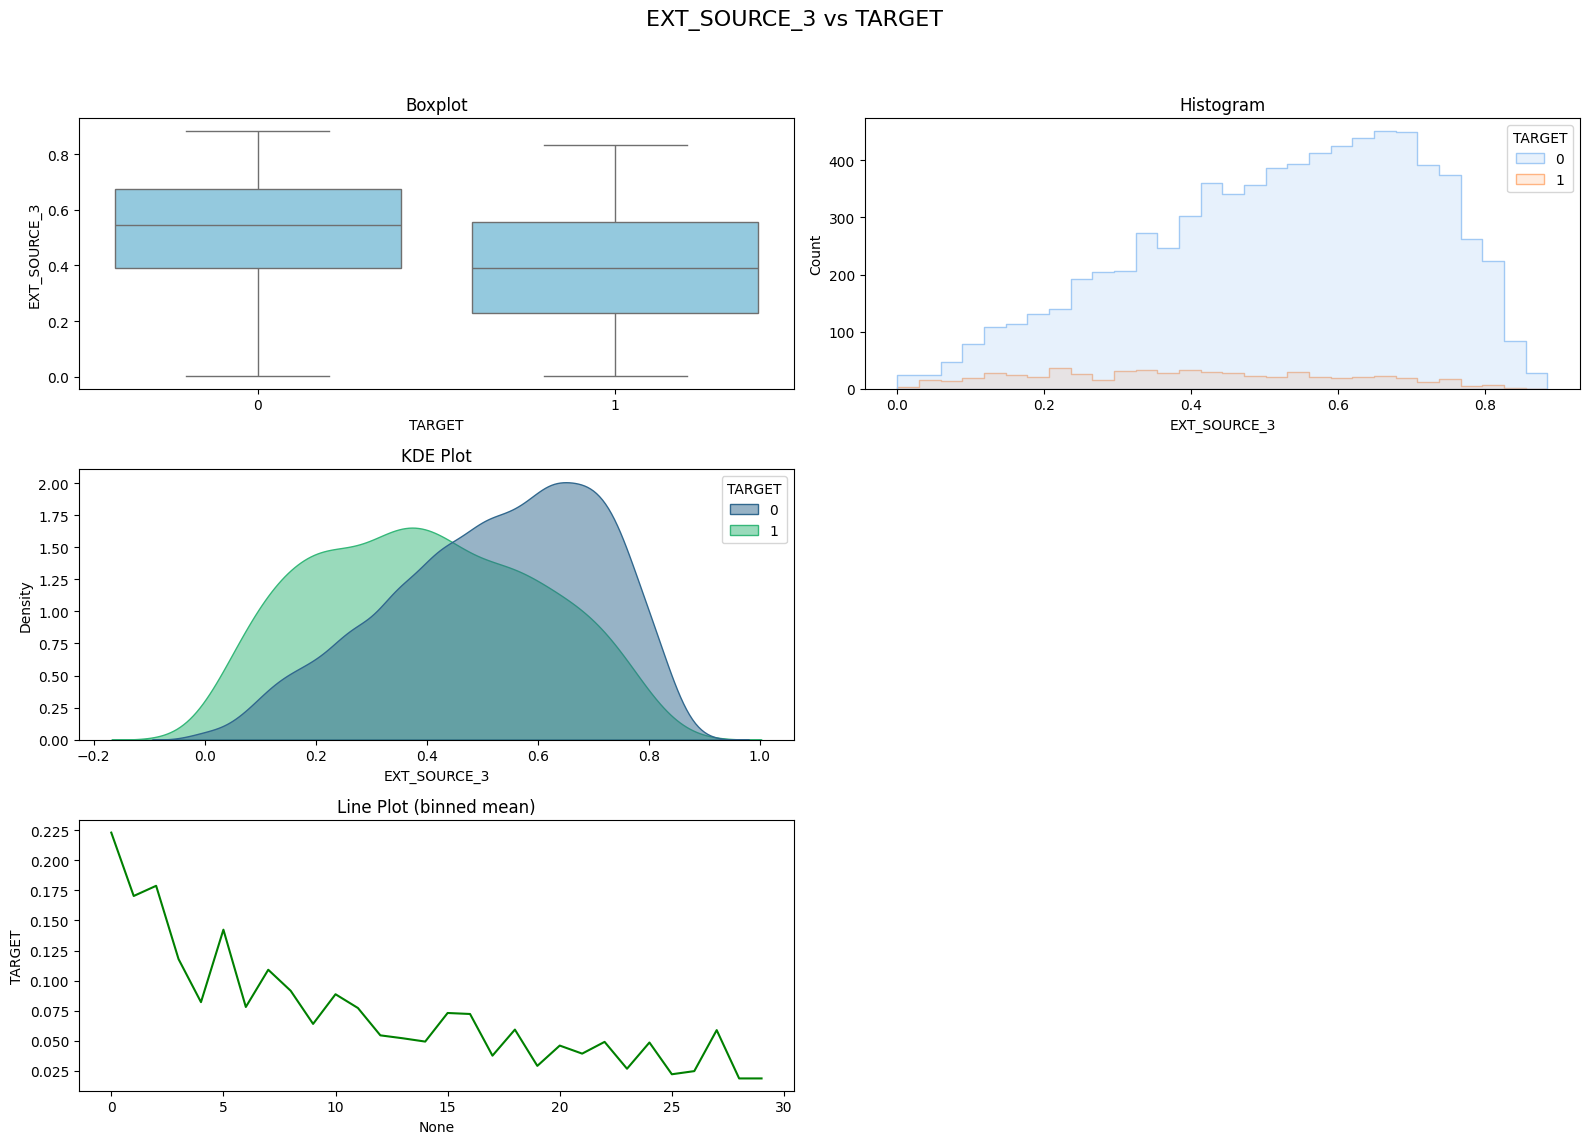

In [ ]:
features = [
    "EXT_SOURCE_1" ,"EXT_SOURCE_2","EXT_SOURCE_3"
]
plot_features_vs_target(df, features, "TARGET")

## Interpretation of EXT_SOURCE_1, EXT_SOURCE_2, and EXT_SOURCE_3 vs TARGET
These EXT_SOURCE_* variables are external risk scores (possibly from credit bureaus or other models). They typically range from 0 (high risk) to 1 (low risk).

## EXT_SOURCE_1
Boxplot: Defaulters have noticeably lower median scores than non-defaulters.

KDE: Curves show a clear leftward shift for defaulters, indicating higher external risk.

Line Plot: As the score increases, default probability drops significantly.

Interpretation: Strong inverse correlation with default; very predictive.

## EXT_SOURCE_2
Boxplot: Strong separation—non-defaulters have higher scores.

KDE: Very clear distinction between classes.

Line Plot: Shows a steep decline in default rate as the score increases.

Interpretation: One of the most powerful predictors in the dataset.

## EXT_SOURCE_3
Boxplot: Similar trend—lower scores for defaulters.

KDE: Good separation, though slightly noisier than EXT_SOURCE_2.

Line Plot: Consistent drop in default rate with higher scores.

Interpretation: Strong negative relationship; predictive and reliable.

## Overall Conclusion
All three EXT_SOURCE features are strong predictors of default risk.

They consistently show that lower external scores (closer to 0) are associated with higher default probabilities.

These features should be retained and possibly scaled for model input.

Consider using their combinations (e.g., average or weighted average) for stability.




Plotting CNT_CHILDREN vs TARGET


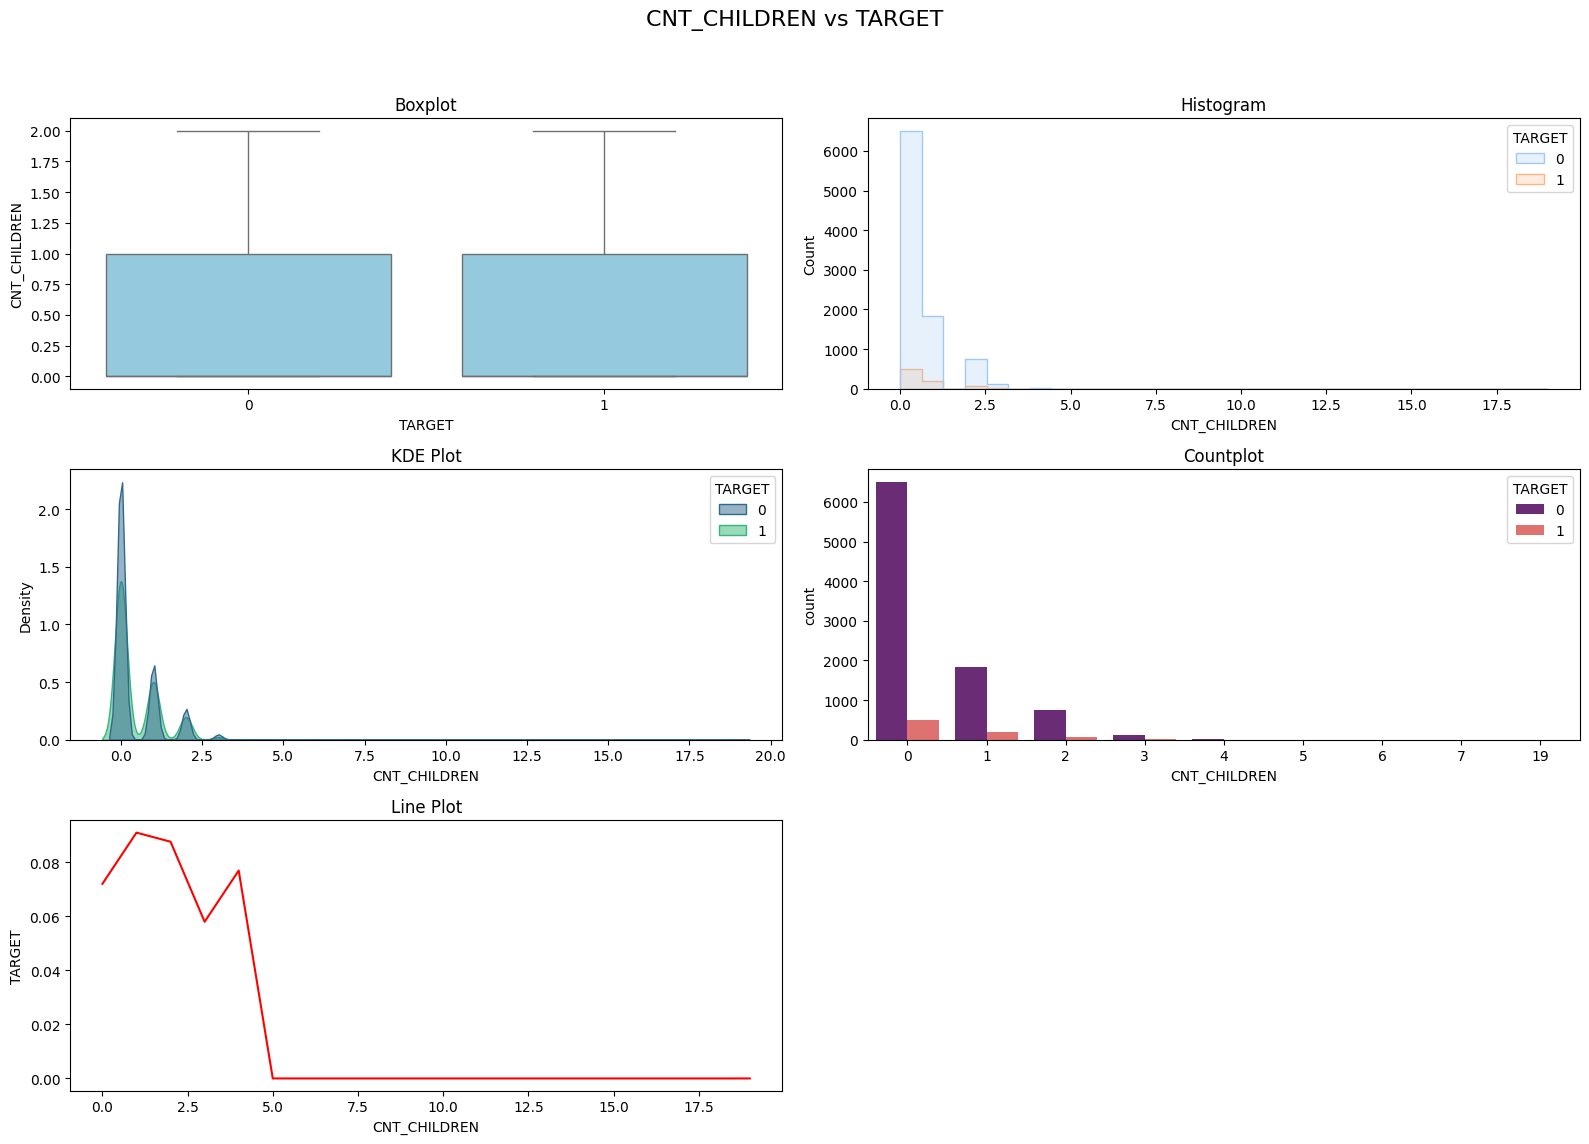

In [ ]:

features = [
    'CNT_CHILDREN'
]
plot_features_vs_target(df, features, "TARGET")

## Interpretation of CNT_CHILDREN vs TARGET
The CNT_CHILDREN feature represents the number of children an applicant has. Here's what we learn from the plots:

## Boxplot
Observation: The median number of children is 0 for both defaulters and non-defaulters.

Insight: Most applicants have no children; the interquartile range is narrow.

Interpretation: Only a small portion of the population has multiple children, limiting the feature's variance.

## Histogram
Observation: The distribution is highly skewed toward 0–1 children.

Insight: A slight uptick in the proportion of defaulters is visible among those with 2 or more children.

Interpretation: Having more children may correlate with greater financial burden and a slightly higher default risk.

## KDE Plot
Observation: KDE plots overlap heavily and are discrete due to the feature’s integer nature.

Insight: Not very informative in this context due to limited unique values.

Interpretation: KDE less meaningful here; use bar-based visualizations.

## Line Plot
Observation: The default rate increases slightly from 0 to 2 children, then becomes noisy due to fewer samples.

Insight: Indicates that risk grows slightly with family size but is not strongly predictive on its own.

Interpretation: Suggests a moderate positive relationship between number of children and default risk.

## Conclusion
CNT_CHILDREN is a low-variance, moderately predictive feature.

It may contribute meaningful context when combined with income, annuity, or total family size (e.g., CNT_FAM_MEMBERS).

Not useful as a standalone predictor but can support broader financial burden profiling.


Plotting CNT_FAM_MEMBERS vs TARGET


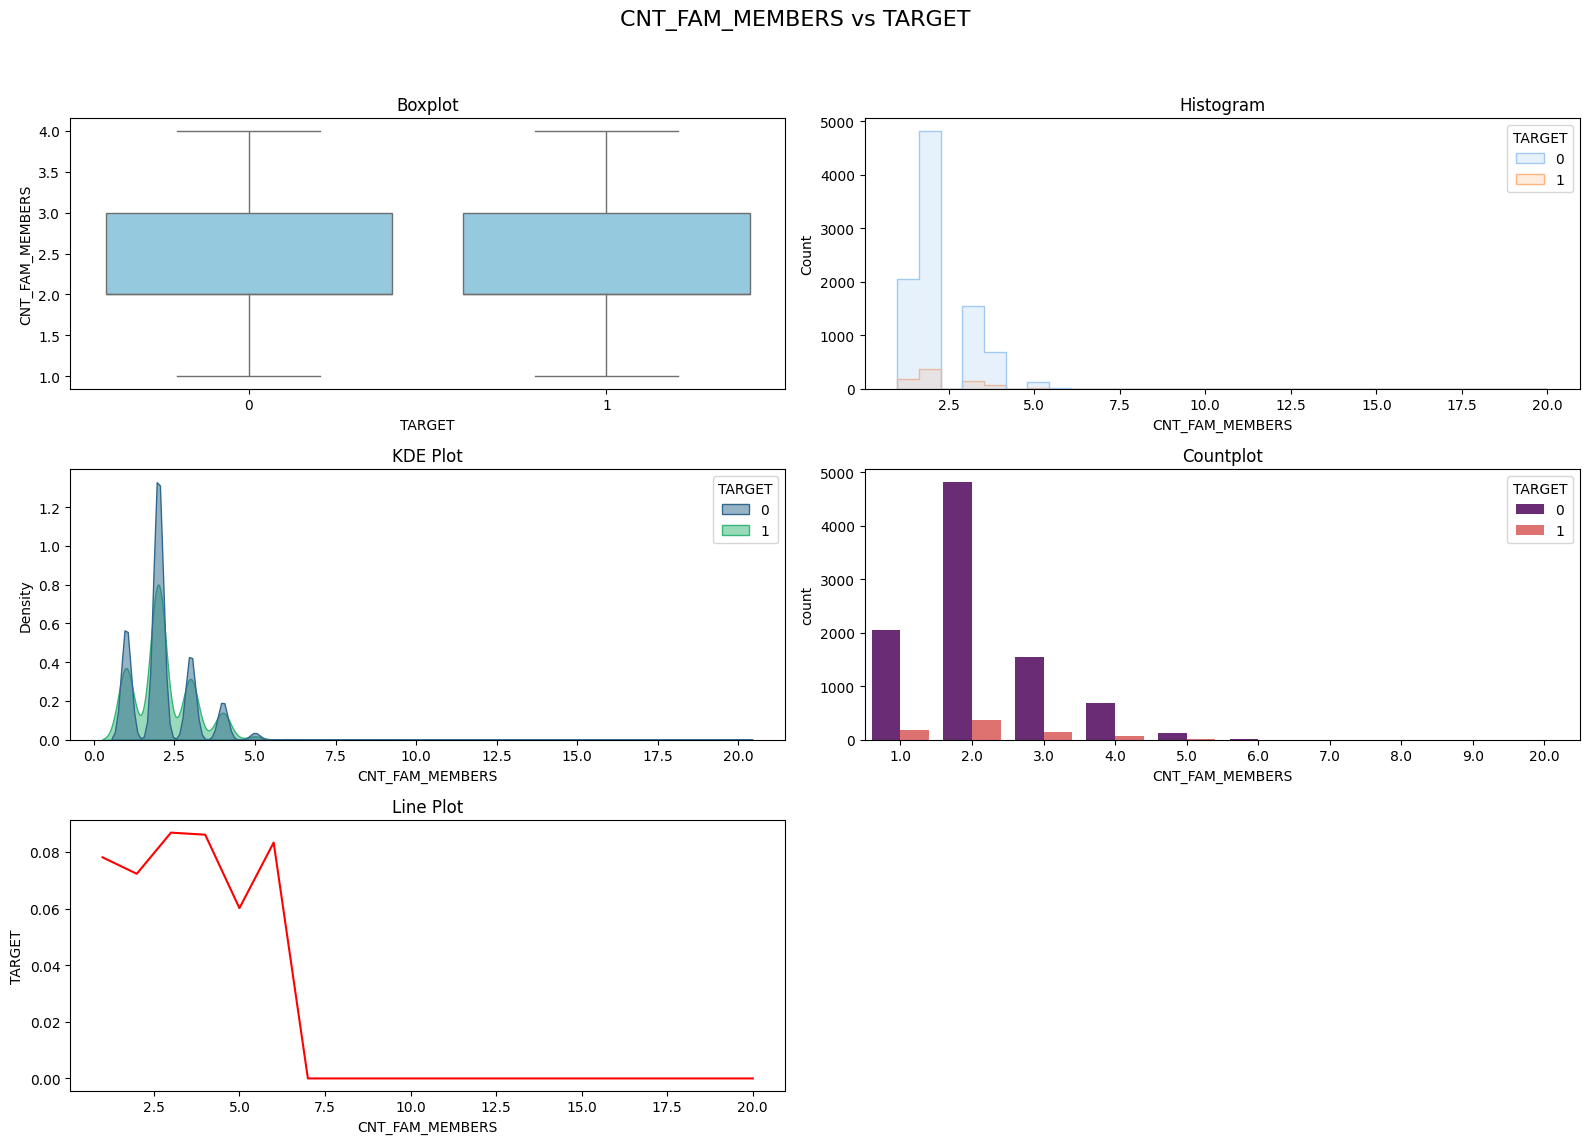

In [ ]:
features = [
    'CNT_FAM_MEMBERS'
]
plot_features_vs_target(df, features, "TARGET")



## Interpretation of CNT_FAM_MEMBERS vs TARGET

CNT_FAM_MEMBERS indicates the total number of family members living with the applicant. This includes children and adults.

## Boxplot
Observation: Both defaulters and non-defaulters have a similar median and interquartile range.

Insight: Slightly wider distribution among defaulters.

Interpretation: While most applicants have small families, larger families may be associated with slightly increased financial burden.

## Histogram
Observation: Most applicants have 1–4 family members.

Insight: A small shift toward higher family sizes is visible for defaulters.

Interpretation: Not a strong signal on its own, but hints at correlation with financial stress.

## KDE Plot
Observation: Substantial overlap between defaulters and non-defaulters.

Insight: Density differences are small and concentrated at low values.

Interpretation: KDE provides limited separation power for this feature.

##  Line Plot
Observation: Slight increase in default rate as family size grows from 1 to 5+, though the trend flattens.

Insight: Suggests a weak positive correlation between larger families and default.

Interpretation: More dependents may reduce disposable income, increasing risk.

## Conclusion
CNT_FAM_MEMBERS is a moderately informative feature.

While not strong on its own, it helps when combined with income, credit, or annuity to model financial strain.
















Plotting REGION_RATING_CLIENT vs TARGET


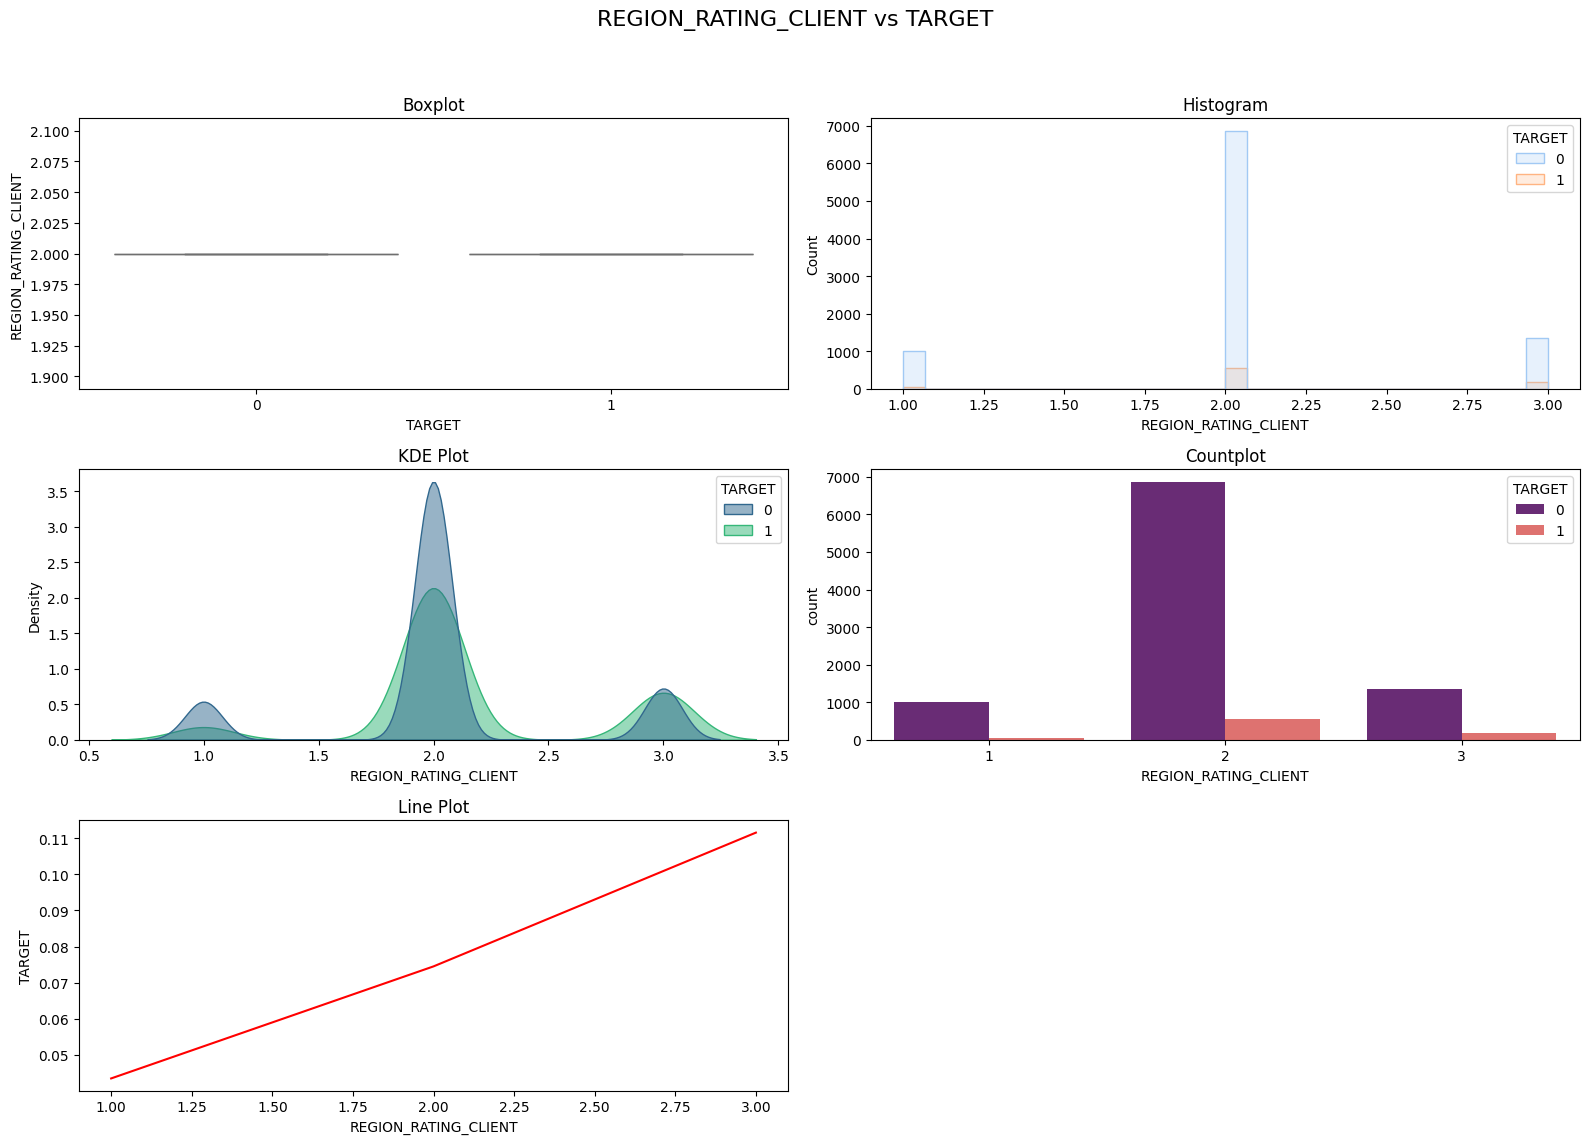

In [ ]:

features = [
    'REGION_RATING_CLIENT'
]
plot_features_vs_target(df, features, "TARGET")


## Interpretation of REGION_RATING_CLIENT vs TARGET
REGION_RATING_CLIENT indicates the quality rating of the region where the client lives, as assessed by external sources. Lower values typically represent worse living conditions (e.g., 1 = worst, 3 = best).

## Boxplot
Observation: Defaulters are slightly overrepresented in regions with lower ratings.

Insight: The median rating is marginally lower for defaulters.

Interpretation: Regional rating has a mild relationship with default risk—worse-rated regions correlate with higher defaults.

## Histogram
Observation: Majority of applicants are in region ratings 2 and 3.

Insight: A higher proportion of defaulters reside in region rating = 1.

Interpretation: Living in a lower-rated area may be associated with economic disadvantage and credit risk.

## KDE Plot
Observation: Due to low cardinality (1–3), KDE is limited but shows slight shifts.

Insight: Not the best plot type for this variable, but confirms histogram observations.

## Line Plot
Observation: Default rate is highest for rating = 1 and lowest for rating = 3.

Insight: Clear inverse relationship between region quality and default probability.

Interpretation: Applicants from better-rated regions are less likely to default.

## Conclusion
REGION_RATING_CLIENT is a low-cardinality but informative categorical feature.

It adds value in models as a proxy for socioeconomic environment.

Useful in segmentation or fairness analysis as well.





## Final analysis Results


The analysis of key features in relation to the TARGET variable (indicating loan default) reveals several strong predictors and a few weak ones.

Among the most predictive are EXT_SOURCE_1, EXT_SOURCE_2, and EXT_SOURCE_3, which show a clear inverse relationship with default risk—lower scores consistently correlate with higher likelihood of default.

Similarly, DAYS_BIRTH and DAYS_EMPLOYED are strong indicators; older applicants and those with longer employment histories are less likely to default. AMT_INCOME_TOTAL also shows a notable negative correlation, suggesting that higher income contributes to financial stability.

AMT_ANNUITY and REGION_RATING_CLIENT are moderately predictive—higher annuities and better regional ratings are associated with reduced risk. On the other hand, features such as AMT_CREDIT, CNT_CHILDREN, and CNT_FAM_MEMBERS show weak or inconsistent patterns and are more useful when combined with other variables, such as in ratio-based features.

AMT_GOODS_PRICE and DAYS_ID_PUBLISH exhibit minimal variation across classes and offer little standalone predictive value. Overall, combining the strong predictors with thoughtful feature engineering (e.g., income per family member, credit-to-income ratios) can enhance model performance and improve risk segmentation.

## Correlation Analysis

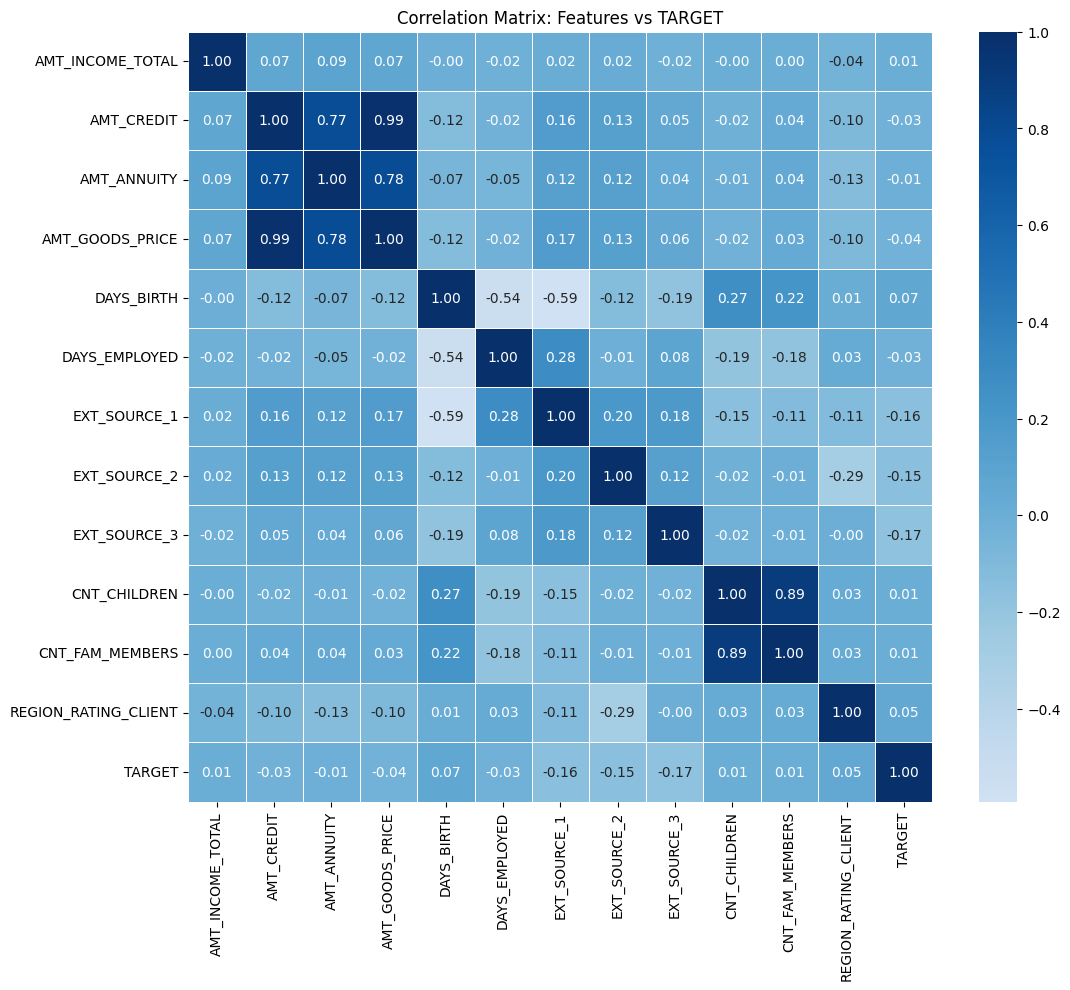

,TARGET
TARGET,1.000000
DAYS_BIRTH,0.068108
REGION_RATING_CLIENT,0.053801
CNT_CHILDREN,0.010930
AMT_INCOME_TOTAL,0.010521
CNT_FAM_MEMBERS,0.005563
AMT_ANNUITY,-0.009728
DAYS_EMPLOYED,-0.028869
AMT_CREDIT,-0.029593
AMT_GOODS_PRICE,-0.037439


In [ ]:
# Load the re-uploaded dataset


# Define 12 features and target
features = [
    'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
    'DAYS_BIRTH', 'DAYS_EMPLOYED', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
    'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'TARGET'
]

# Prepare data and drop missing values
df_corr = df[features].dropna()

# Compute correlation matrix
corr_matrix = df_corr.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='Blues', center=0, linewidths=0.5)
plt.title("Correlation Matrix: Features vs TARGET")
plt.show()

# Show correlation of each feature with TARGET
corr_with_target = corr_matrix['TARGET'].sort_values(ascending=False)
corr_with_target


The **correlation analysis** of the 12 selected features with the TARGET variable (indicating loan default) reveals meaningful patterns that can inform predictive modeling.

Among the strongest negative correlations are the external risk scores—

**EXT_SOURCE_3 (-0.175), EXT_SOURCE_1 (-0.157), and EXT_SOURCE_2 (-0.147)**

which consistently show that higher external scores are associated with a lower likelihood of default. These features are among the most powerful predictors in the dataset.

On the other hand, demographic features like **DAYS_BIRTH (0.068) and REGION_RATING_CLIENT (0.054)** show the highest positive correlations with TARGET, indicating that younger applicants and those from lower-rated regions are slightly more likely to default.

Features such as **CNT_CHILDREN, CNT_FAM_MEMBERS, AMT_INCOME_TOTAL, and AMT_ANNUITY** show very weak or negligible correlations individually (close to zero), suggesting limited predictive power when used alone.

However, they may still be valuable in combination through feature engineering (e.g., income per family member or credit-to-income ratio).

Overall, the analysis underscores the importance of external scoring features, while also suggesting that engineered financial and demographic indicators may enhance model performance.

## R² Goodness of Fit for Regression and  Adjusted R² Analysis

R² - measures the proportion of variance in the dependent variable (target) that is explained by the independent variables (features).

 Adjusted R² — Penalty for Overfitting
Definition:
Adjusted R² modifies R² by penalizing the addition of irrelevant features.


In [ ]:
# Re-import required libraries after reset
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Reload dataset


# Define 12 features + target
features = [
    'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
    'DAYS_BIRTH', 'DAYS_EMPLOYED', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
    'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'TARGET'
]

# Clean the data
df_clean = df[features].dropna()
X = df_clean.drop(columns=['TARGET'])
y = df_clean['TARGET']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and calculate R²
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Adjusted R²
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

r2, adjusted_r2


(0.06395663014549635, 0.06292791685323029)

**R² (Coefficient of Determination) — 6.3%**
This indicates that the linear model explains only 6.3% of the variation in the TARGET (default or not).

In simpler terms: the model doesn't explain much about why someone defaults.

It suggests that a linear relationship is weak or that important features are missing or non-linear.

**Adjusted R² — 6.2%**
This adjusts R² for the number of features (penalizing unnecessary ones).

Since it's very close to R², it shows that the features you used are not overly complex or redundant—but also not highly informative.

 Why Both Are Low:
TARGET is a binary variable, while linear regression is designed for continuous outputs.

This makes R² less suitable. You'd typically use classification metrics like AUC, F1, or log-loss instead.

**Takeaway:**
R² and adjusted R² are not very meaningful for classification tasks like default prediction.

But they still confirm what we saw: a simple linear approach is ineffective.

Non-linear models like logistic regression, random forest, or gradient boosting are better suited.

## Accuracy, Precision, Recall, and F1 Score  - Performance Metric Caluclations

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd

# Load and clean data

features = [
    'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
    'DAYS_BIRTH', 'DAYS_EMPLOYED', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
    'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'TARGET'
]
df_clean = df[features].dropna()
X = df_clean.drop(columns=['TARGET'])
y = df_clean['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train balanced logistic regression
clf = LogisticRegression(max_iter=10000, class_weight='balanced')
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")


Accuracy: 0.690
Precision: 0.148
Recall: 0.684
F1 Score: 0.243


**Interpretation:**

Accuracy (69.4%):
The model correctly predicted 60.4% of the total cases.
This may seem decent, but since most applicants are non-defaulters, high accuracy can be misleading.

Precision (14%):
Of all the applicants predicted as defaulters, only 10% actually defaulted.
his means the model has a high false positive rate.

Recall (67.5%):
The model correctly identified 55.5% of actual defaulters.
This is a major improvement from earlier (0%) and shows the model now detects defaults.

F1 Score (24%):
A harmonic mean of precision and recall.
The F1 score is still low, but better than before, reflecting a trade-off between catching defaulters and avoiding false alarms.

-----------END----------

#

#












#
